CS 663 Machine Learning Lab 2 KNN

In [180]:
#Author: Ziyang Liu
#1. Import the dataset and perform an initial EDA

import pandas as pd

df = pd.read_csv('diamonds.csv',index_col=None)
df = df.iloc[:,1:]
df

carat        cut color clarity  depth  table  price     x     y     z
0       0.23      Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43
1       0.21    Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31
2       0.23       Good     E     VS1   56.9   65.0    327  4.05  4.07  2.31
3       0.29    Premium     I     VS2   62.4   58.0    334  4.20  4.23  2.63
4       0.31       Good     J     SI2   63.3   58.0    335  4.34  4.35  2.75
...      ...        ...   ...     ...    ...    ...    ...   ...   ...   ...
53935   0.72      Ideal     D     SI1   60.8   57.0   2757  5.75  5.76  3.50
53936   0.72       Good     D     SI1   63.1   55.0   2757  5.69  5.75  3.61
53937   0.70  Very Good     D     SI1   62.8   60.0   2757  5.66  5.68  3.56
53938   0.86    Premium     H     SI2   61.0   58.0   2757  6.15  6.12  3.74
53939   0.75      Ideal     D     SI2   62.2   55.0   2757  5.83  5.87  3.64

[53940 rows x 10 columns]

In [181]:
#1. a. Look for null values and drop rows with n/a values
df = df.dropna()
df

carat        cut color clarity  depth  table  price     x     y     z
0       0.23      Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43
1       0.21    Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31
2       0.23       Good     E     VS1   56.9   65.0    327  4.05  4.07  2.31
3       0.29    Premium     I     VS2   62.4   58.0    334  4.20  4.23  2.63
4       0.31       Good     J     SI2   63.3   58.0    335  4.34  4.35  2.75
...      ...        ...   ...     ...    ...    ...    ...   ...   ...   ...
53935   0.72      Ideal     D     SI1   60.8   57.0   2757  5.75  5.76  3.50
53936   0.72       Good     D     SI1   63.1   55.0   2757  5.69  5.75  3.61
53937   0.70  Very Good     D     SI1   62.8   60.0   2757  5.66  5.68  3.56
53938   0.86    Premium     H     SI2   61.0   58.0   2757  6.15  6.12  3.74
53939   0.75      Ideal     D     SI2   62.2   55.0   2757  5.83  5.87  3.64

[53940 rows x 10 columns]

In [182]:
#2. Convert categorical variables to binary integers
df = pd.get_dummies(df)
df

carat  depth  table  price     x     y     z  cut_Fair  cut_Good  \
0       0.23   61.5   55.0    326  3.95  3.98  2.43         0         0   
1       0.21   59.8   61.0    326  3.89  3.84  2.31         0         0   
2       0.23   56.9   65.0    327  4.05  4.07  2.31         0         1   
3       0.29   62.4   58.0    334  4.20  4.23  2.63         0         0   
4       0.31   63.3   58.0    335  4.34  4.35  2.75         0         1   
...      ...    ...    ...    ...   ...   ...   ...       ...       ...   
53935   0.72   60.8   57.0   2757  5.75  5.76  3.50         0         0   
53936   0.72   63.1   55.0   2757  5.69  5.75  3.61         0         1   
53937   0.70   62.8   60.0   2757  5.66  5.68  3.56         0         0   
53938   0.86   61.0   58.0   2757  6.15  6.12  3.74         0         0   
53939   0.75   62.2   55.0   2757  5.83  5.87  3.64         0         0   

       cut_Ideal  ...  color_I  color_J  clarity_I1  clarity_IF  clarity_SI1  \
0              1  ...        0        0           0           0            0   
1              0  ...        0        0           0           0            1   
2              0  ...        0        0           0           0            0   
3              0  ...        1        0           0           0            0   
4              0  ...        0        1           0           0            0   
...          ...  ...      ...      ...         ...         ...          ...   
53935          1  ...        0        0           0           0            1   
53936          0  ...        0        0           0           0            1   
53937          0  ...        0        0           0           0            1   
53938          0  ...        0        0           0           0            0   
53939          1  ...        0        0           0           0            0   

       clarity_SI2  clarity_VS1  clarity_VS2  clarity_VVS1  clarity_VVS2  
0                1            0            0             0             0  
1                0            0            0             0             0  
2                0            1            0             0             0  
3                0            0            1             0             0  
4                1            0            0             0             0  
...            ...          ...          ...           ...           ...  
53935            0            0            0             0             0  
53936            0            0            0             0             0  
53937            0            0            0             0             0  
53938            1            0            0             0             0  
53939            1            0            0             0             0  

[53940 rows x 27 columns]

In [183]:
#3. Generate a correlation matrix and a heatmap
#3.1. Correlation matrix:
corr_matrix = df.corr()
corr_matrix['price'].sort_values(ascending=False)

price            1.000000
carat            0.921591
x                0.884435
y                0.865421
z                0.861249
clarity_SI2      0.128420
table            0.127134
color_I          0.097125
cut_Premium      0.095706
color_J          0.081710
color_H          0.059223
cut_Fair         0.018728
clarity_SI1      0.008957
color_G          0.008556
cut_Very Good    0.006593
clarity_I1      -0.000255
cut_Good        -0.000312
clarity_VS2     -0.001062
clarity_VS1     -0.009886
depth           -0.010647
color_F         -0.024161
clarity_IF      -0.049596
clarity_VVS2    -0.052381
color_D         -0.072473
clarity_VVS1    -0.095266
cut_Ideal       -0.097175
color_E         -0.101089
Name: price, dtype: float64

<AxesSubplot:>

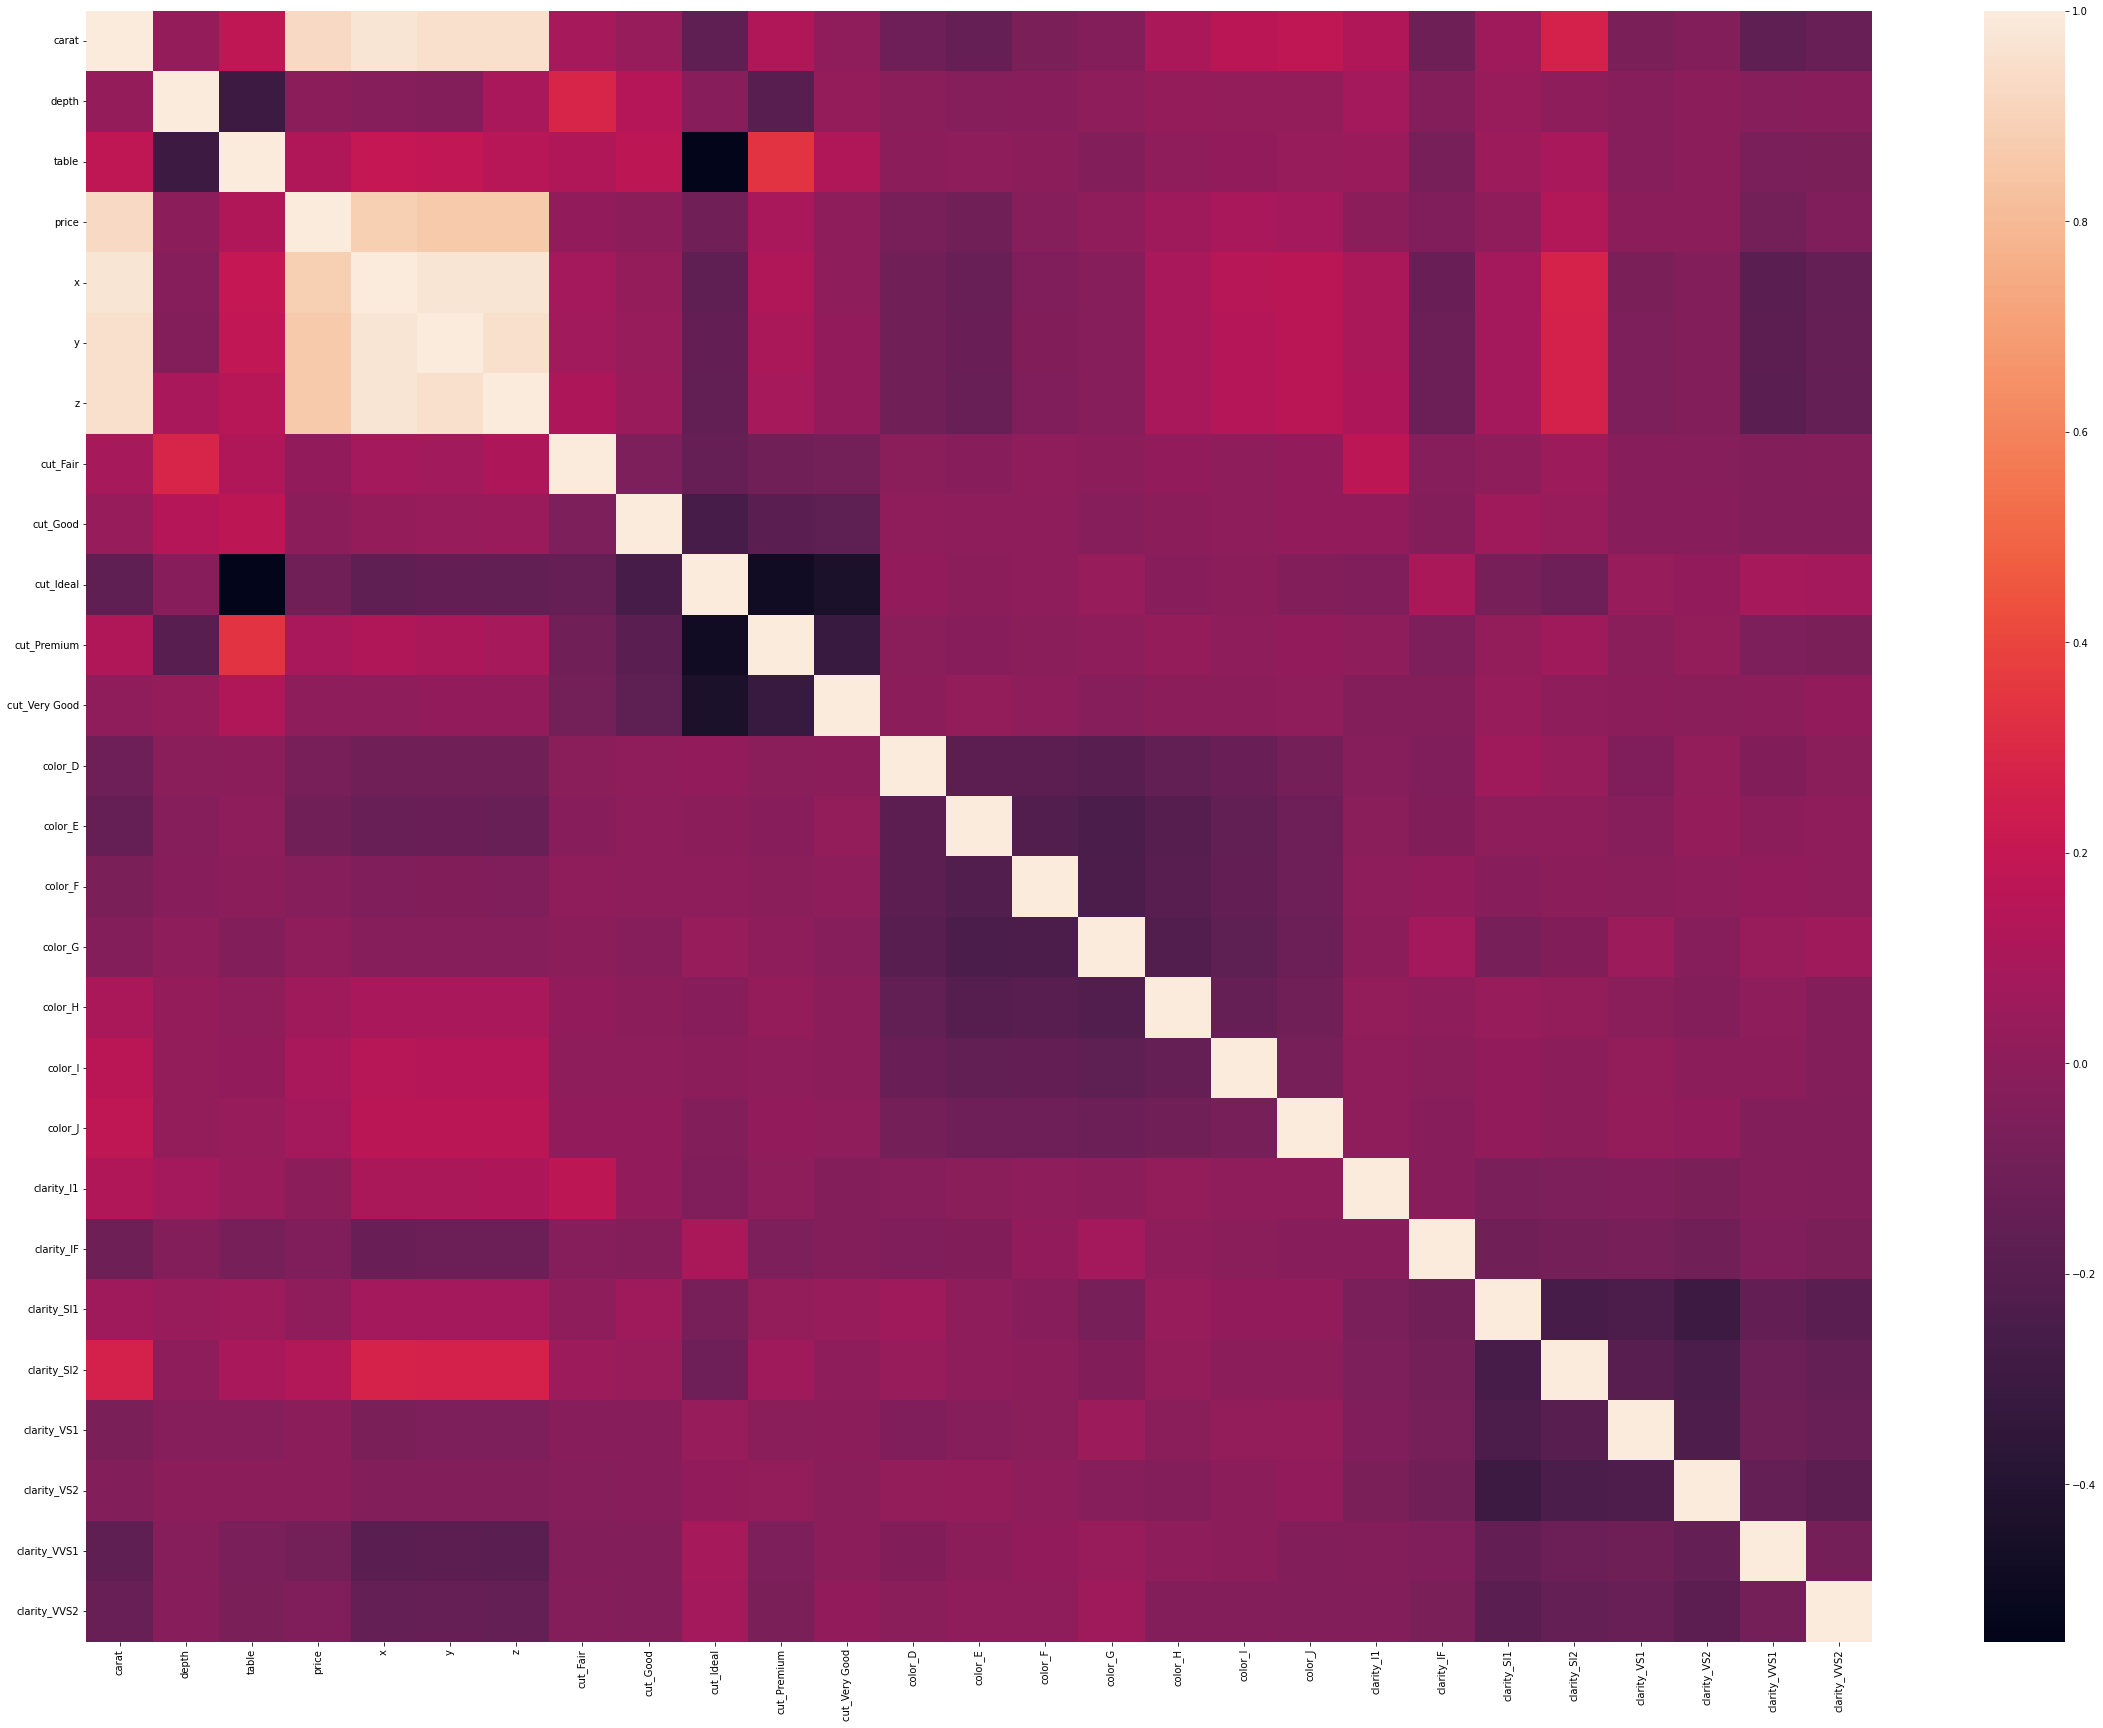

In [184]:
#3.2 Heat map:
import seaborn as sns
import matplotlib.pyplot as plt


plt.figure(figsize=[40,30])
sns.heatmap(corr_matrix)

'carat' has the strongest correlation with price. 

In [112]:
#4. Prepare data for model:
# 4.1. PCA for finding most important features:
from sklearn.decomposition import PCA
pca = PCA(n_components=27)

Text(0, 0.5, '% variance explained')

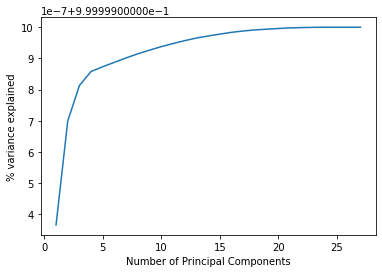

In [113]:
import matplotlib.pyplot as plt
pca.fit(df)
evr = pca.explained_variance_ratio_
plt.plot(range(1, 28), evr.cumsum())
plt.xlabel('Number of Principal Components')
plt.ylabel('% variance explained')

We keep all the features.

In [114]:
y = df['price']
df.drop(['price'], axis=1, inplace=True)
x =df

In [115]:
x

carat  depth  table     x     y     z  cut_Fair  cut_Good  cut_Ideal  \
0       0.23   61.5   55.0  3.95  3.98  2.43         0         0          1   
1       0.21   59.8   61.0  3.89  3.84  2.31         0         0          0   
2       0.23   56.9   65.0  4.05  4.07  2.31         0         1          0   
3       0.29   62.4   58.0  4.20  4.23  2.63         0         0          0   
4       0.31   63.3   58.0  4.34  4.35  2.75         0         1          0   
...      ...    ...    ...   ...   ...   ...       ...       ...        ...   
53935   0.72   60.8   57.0  5.75  5.76  3.50         0         0          1   
53936   0.72   63.1   55.0  5.69  5.75  3.61         0         1          0   
53937   0.70   62.8   60.0  5.66  5.68  3.56         0         0          0   
53938   0.86   61.0   58.0  6.15  6.12  3.74         0         0          0   
53939   0.75   62.2   55.0  5.83  5.87  3.64         0         0          1   

       cut_Premium  ...  color_I  color_J  clarity_I1  clarity_IF  \
0                0  ...        0        0           0           0   
1                1  ...        0        0           0           0   
2                0  ...        0        0           0           0   
3                1  ...        1        0           0           0   
4                0  ...        0        1           0           0   
...            ...  ...      ...      ...         ...         ...   
53935            0  ...        0        0           0           0   
53936            0  ...        0        0           0           0   
53937            0  ...        0        0           0           0   
53938            1  ...        0        0           0           0   
53939            0  ...        0        0           0           0   

       clarity_SI1  clarity_SI2  clarity_VS1  clarity_VS2  clarity_VVS1  \
0                0            1            0            0             0   
1                1            0            0            0             0   
2                0            0            1            0             0   
3                0            0            0            1             0   
4                0            1            0            0             0   
...            ...          ...          ...          ...           ...   
53935            1            0            0            0             0   
53936            1            0            0            0             0   
53937            1            0            0            0             0   
53938            0            1            0            0             0   
53939            0            1            0            0             0   

       clarity_VVS2  
0                 0  
1                 0  
2                 0  
3                 0  
4                 0  
...             ...  
53935             0  
53936             0  
53937             0  
53938             0  
53939             0  

[53940 rows x 26 columns]

In [116]:
y

0         326
1         326
2         327
3         334
4         335
         ... 
53935    2757
53936    2757
53937    2757
53938    2757
53939    2757
Name: price, Length: 53940, dtype: int64

In [117]:
#4.2. split training and testing sets:
# training: train_x, train_y 80%
# testing: test_x, test_y 20%
from sklearn.model_selection import train_test_split

train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.2, random_state=42)

In [118]:
#5. Use KNN to predict the price of the diamonds:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(n_neighbors=2)
knn.fit(train_x,train_y)

KNeighborsRegressor(n_neighbors=2)

In [119]:
# Since we are using regression model, r2 score is good for accuracy calculation
from sklearn.metrics import r2_score
r2_score(test_y, knn.predict(test_x))

0.9373803154915198

In [ ]:
# Use a for loop to run the classifier with different k values:

In [120]:
accuracy_scores = dict()

for k in range (2, 21):
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(train_x,train_y)
    accuracy_scores[k] = r2_score(test_y, knn.predict(test_x))

accuracy_scores

{2: 0.9373803154915198,
 3: 0.9420351115462058,
 4: 0.9441540493157925,
 5: 0.944531703454081,
 6: 0.9442592991862869,
 7: 0.944358894361718,
 8: 0.9441058959591959,
 9: 0.9435534452220793,
 10: 0.9424964528108747,
 11: 0.9410211117676682,
 12: 0.9409350191112013,
 13: 0.940111310017272,
 14: 0.9393166707686734,
 15: 0.9388111282927647,
 16: 0.9380118778736437,
 17: 0.9377414613217944,
 18: 0.9370930534230028,
 19: 0.9366312646717433,
 20: 0.9361743031779521}

We see from above, k=5 yields the best result

In [173]:
#6. Visualize KNN predictor results VS actual prices
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(train_x,train_y)
hyp = knn.predict(test_x)

In [174]:
y = test_y.to_numpy()

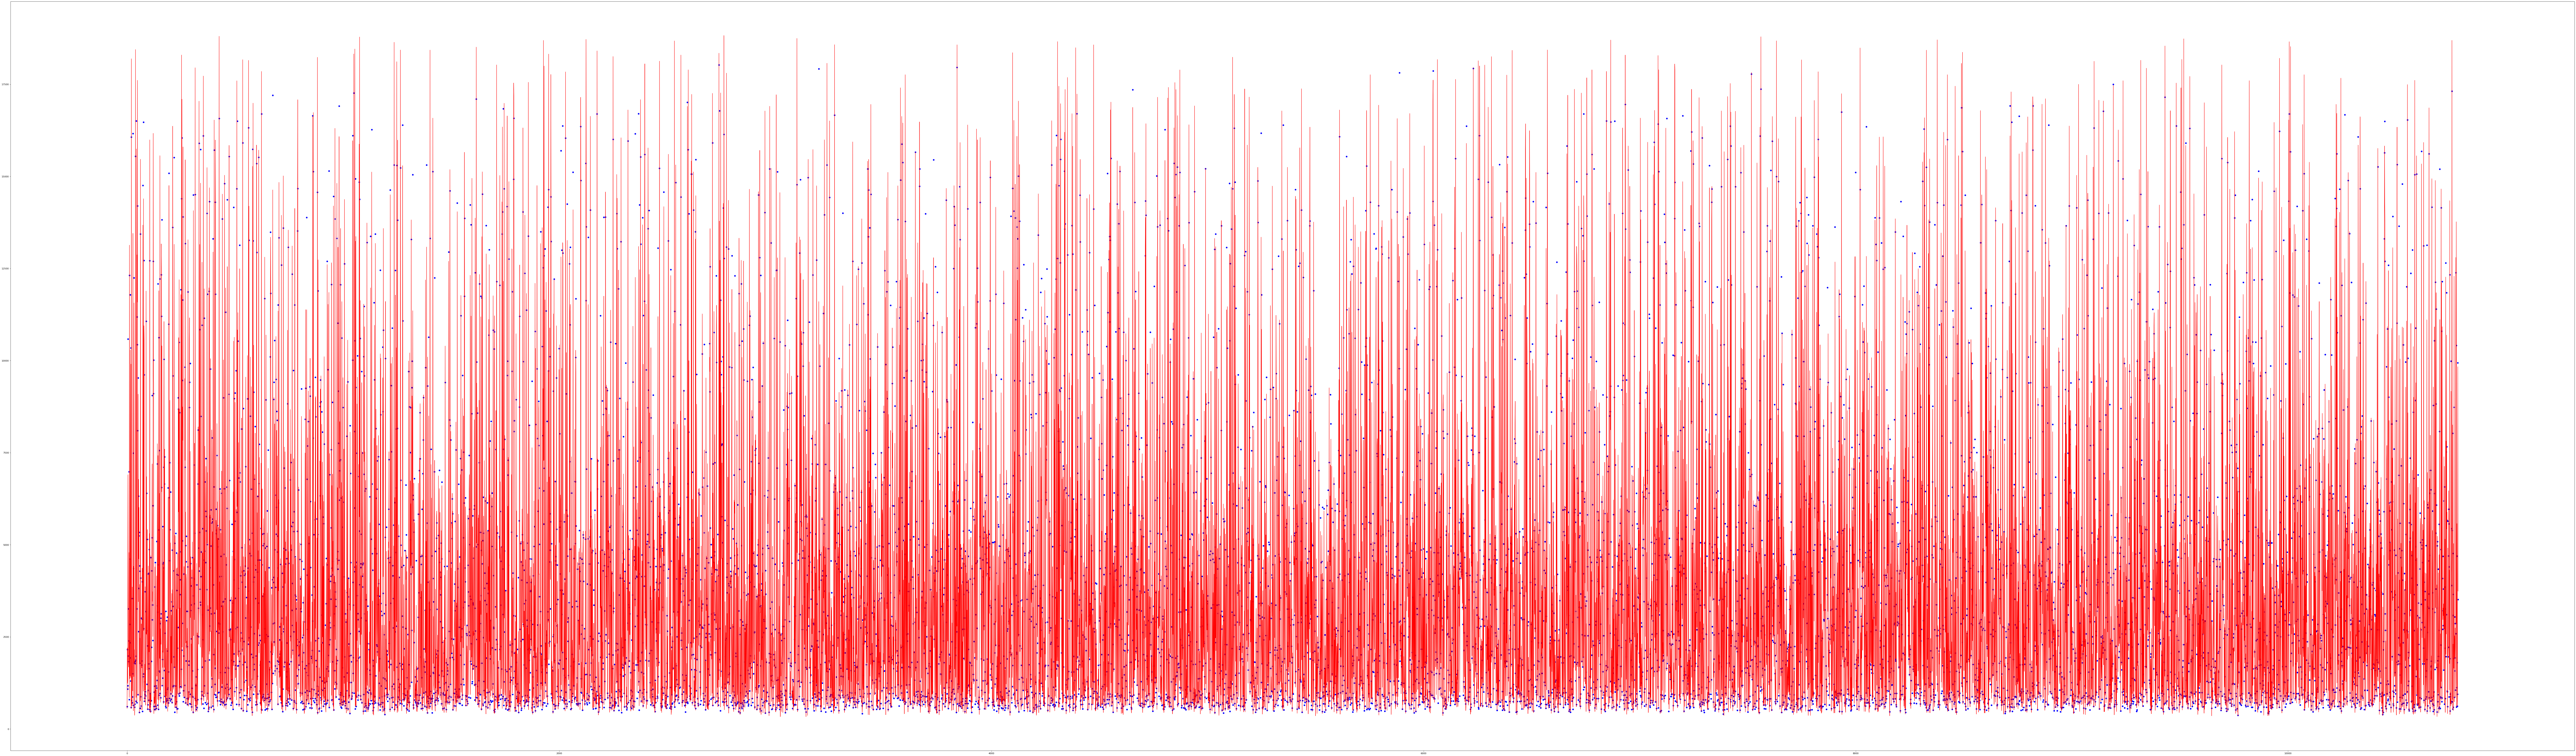

In [175]:
import numpy as np
from matplotlib.pyplot import figure
figure(figsize=(200, 60), dpi=80)

x_hyp = np.arange(len(hyp))
plt.scatter(x_hyp, hyp , color="blue", label="predict")
plt.plot(x_hyp, y, color="red", label="original")
plt.show()

Since there are over 10,000 data points, the visualization result is hard to read, let's reduce the size of the chart:

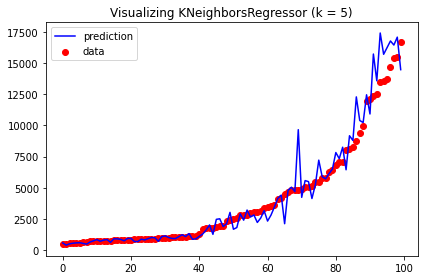

In [179]:
# sampling: get 100 data points for a better visualization
randnums= np.random.randint(1,len(hyp),100)
hyp_samples = hyp[randnums]
args = np.argsort(hyp[randnums])
hyp_samples.sort()
test_samples = y[randnums]
test_samples = test_samples[args]

x_arr = np.arange(100)

plt.scatter(x_arr,hyp_samples, color="red", label="data")
plt.plot(x_arr,test_samples, color="blue", label="prediction")
plt.axis("tight")
plt.legend()
plt.title("Visualizing KNeighborsRegressor (k = 5)")
plt.tight_layout()
plt.show()